<a href="https://colab.research.google.com/github/jlpaniagua/FundamentalsAI/blob/master/CNNKerasTF2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import datetime, os

from tensorflow.keras.utils import plot_model

In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary()

In [0]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

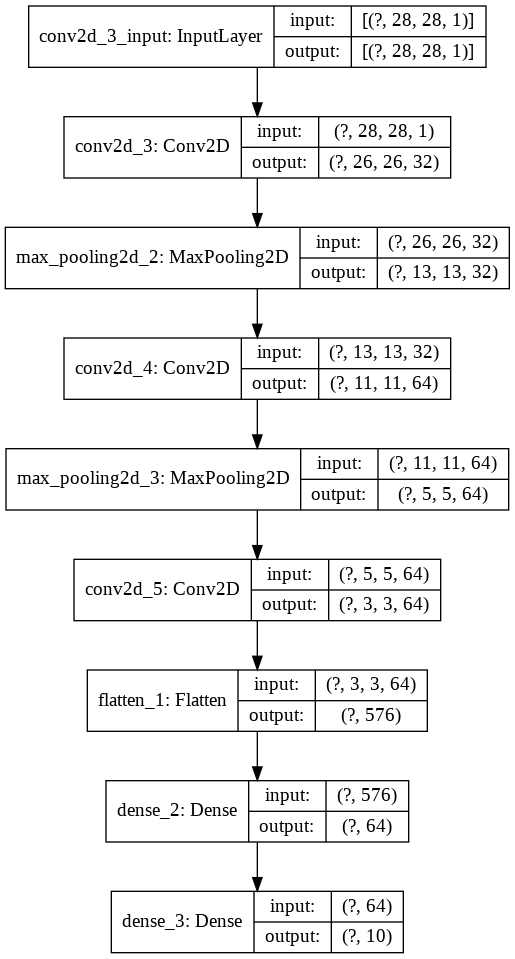

In [21]:
plot_model(model, to_file='CNN.png', show_shapes=True)

In [14]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1719 - accuracy: 0.9477
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0474 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0247 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0193 - accuracy: 0.9939


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

curr_Output=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step - loss: 0.0275 - accuracy: 0.9922
0.9922000169754028


In [0]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

#    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

In [0]:
Out_CM=np.zeros([10000,1],dtype=np.float64)  
y_test_CM=np.zeros([10000,1],dtype=np.float64)
Out_test_CM=np.zeros([10000,1],dtype=np.float64)
for ii in range(0,10000):
    Out_test_CM[ii] = np.argmax(curr_Output[ii,:])
    y_test_CM[ii] = np.argmax(test_labels[ii,:])

Matrix de confusion No Normalizada
 Matrix de confusion Normalizada 


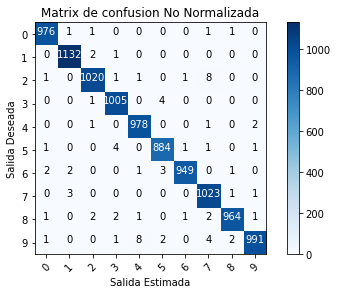

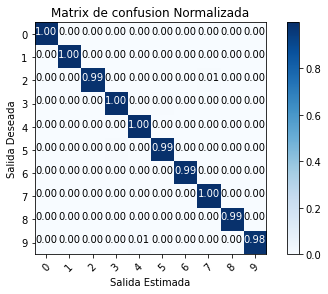

In [20]:
class_names=['0', '1', '2','3', '4', '5','6', '7', '8','9']    


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_CM, Out_test_CM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()